In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
%matplotlib inline  
import warnings
import itertools


import seaborn as sns # for prettier plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs



In [2]:
sales=pd.read_csv("sales_train_v2.csv")
item_cat=pd.read_csv("item_categories.csv")
item=pd.read_csv("items.csv")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv")


In [3]:
print sales.head(10)

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0


In [4]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [21]:
sales_series = sales.groupby(["date_block_num", "shop_id", "item_id"]).sum()

In [26]:
sales_series.drop(columns=["item_price"], inplace=True)
sales_series

item_cnt_day
date_block_num shop_id item_id              
0              0       32                6.0
                       33                3.0
                       35                1.0
                       43                1.0
                       51                2.0
                       61                1.0
                       75                1.0
                       88                1.0
                       95                1.0
                       96                1.0
                       98               25.0
                       111               1.0
                       149               3.0
                       151               1.0
                       153               1.0
                       198               1.0
                       210               2.0
                       282               1.0
                       306               1.0
                       351               1.0
                       421               1.0
                       438               1.0
                       482               2.0
                       484               4.0
                       491               1.0
                       498               1.0
                       556               9.0
                       642               6.0
                       651               7.0
                       657               2.0
...                                      ...
33             59      19894             1.0
                       19985             1.0
                       20303             1.0
                       20305             1.0
                       20335             1.0
                       20355             1.0
                       20392             1.0
                       20604             2.0
                       20614             1.0
                       20629             1.0
                       20730             1.0
                       20751             1.0
                       20866             4.0
                       20949            19.0
                       21361             1.0
                       21364             1.0
                       21369             2.0
                       21377             1.0
                       21386             1.0
                       21404             1.0
                       21427             1.0
                       21449             2.0
                       21672             1.0
                       21811             1.0
                       21812             1.0
                       22087             6.0
                       22088             2.0
                       22091             1.0
                       22100             1.0
                       22102             1.0

[1609124 rows x 1 columns]

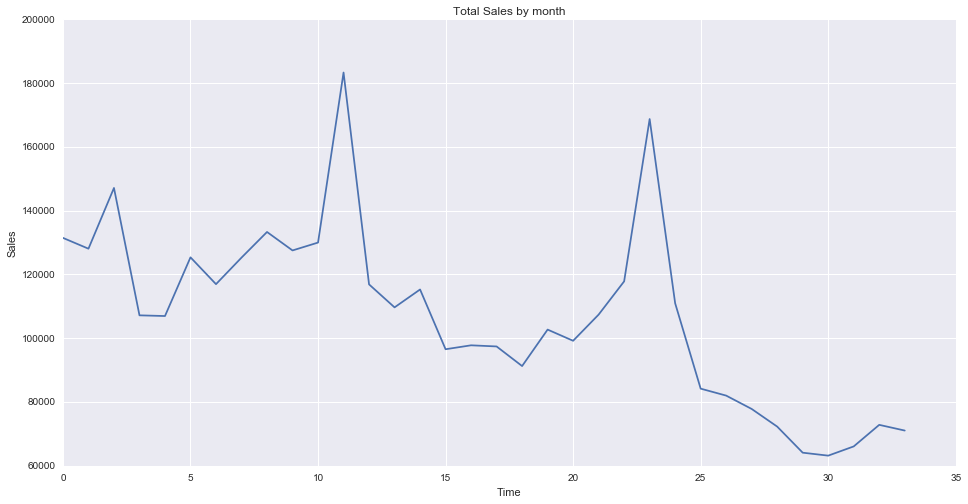

In [5]:
series1=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
series1.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales by month')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(series1);
plt.show()


In [20]:

print sales.head(10)
print test.head(10)
print len(test)

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
5   5        5     5039
6   6        5    

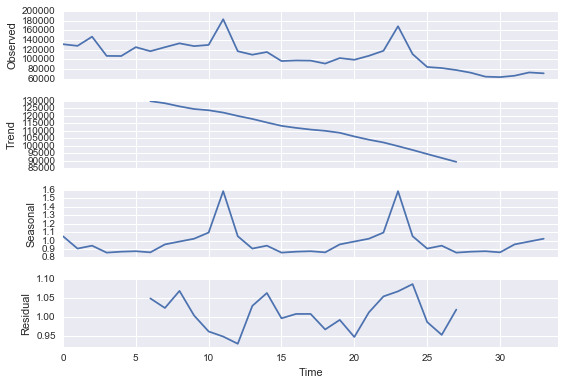

In [6]:
### We can see the trend by season
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(series1.values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()


In [74]:
# There are multiple tests that can be used to check stationarity.
# Stationary time series means: mean and variance not change overtime
# when time series is station we can apply different time model
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return dfoutput['p-value'] 

p = test_stationarity(series1)
print p


Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (5%)            -2.954127
Critical Value (1%)            -3.646135
Critical Value (10%)           -2.615968
dtype: float64
0.142952576993


In [8]:
# the current Series1 is not stationary (p-value)
# we detrend the series1
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob


Results of Dickey-Fuller Test:
Test Statistic                -1.363622e+01
p-value                        1.686395e-25
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (5%)           -3.005426e+00
Critical Value (1%)           -3.769733e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


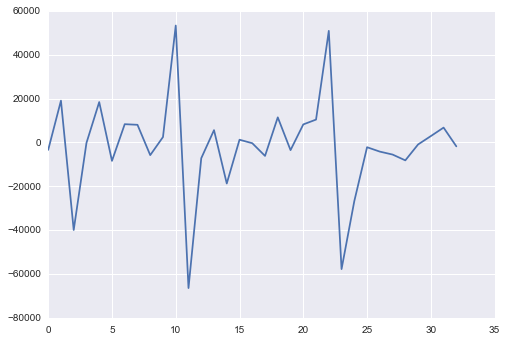

In [9]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()

new_series  = difference(ts)
plt.plot(new_series)
plt.plot()
test_stationarity(new_series)






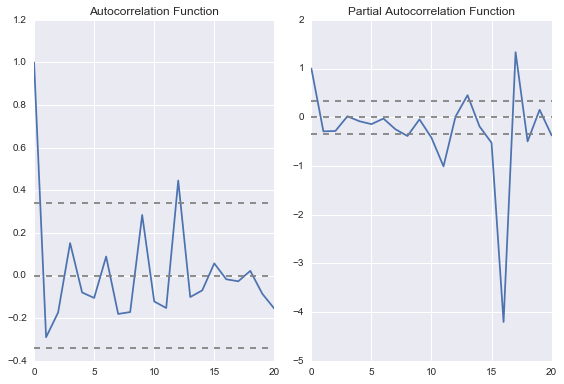

In [10]:
#Now after the transformations, our p-value for the DF test is well within 5 %. Hence we can assume Stationarity of the series¶

#We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(new_series, nlags=20)
lag_pacf = pacf(new_series, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_series)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_series)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


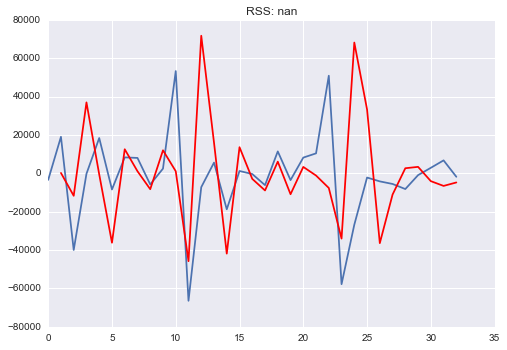

In [11]:
from statsmodels.tsa.arima_model import ARIMA
# AR model
model = ARIMA(new_series, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(new_series)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-new_series)**2))



In [97]:
# Define the d and q parameters to take any value between 0 and 1
def bestArima(ts):
    AIC_list = []
    d =1
    best_param =[0,0,0]
    current_min =10000

    for q in range(0,2):
        for p in range(0,4):
            
            try:
                model = ARIMA(ts, order=(p, d,q))  
                results_ARIMA = model.fit(disp=-1) 
                AIC_list.append(results_ARIMA.aic)
            except:
                continue
            if results_ARIMA.aic < current_min:
                best_param = [p,d,q]
                current_min = results_ARIMA.aic


    print [best_param,current_min]
    return best_param


In [98]:
best_param =bestArima(new_series)

C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

[[1, 1, 1], 460.58986245316737]


C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


$statsmodels.tsa.statespace.sarimax.SARIMAXResults$ returns values for AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion) that can be minimized to select the best fitting model. We use the AIC value, which estimates the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model itself.



743.403708612


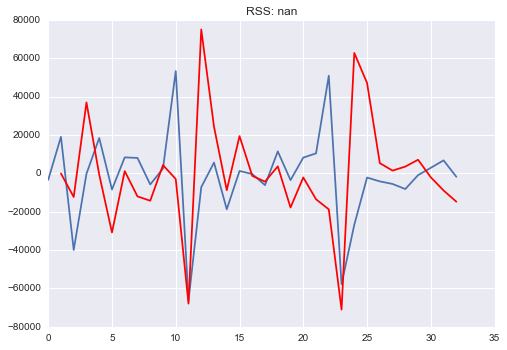

In [73]:
model = ARIMA(new_series, order=best_param)  
results_ARIMA = model.fit(disp=-1) 
print results_ARIMA.aic
plt.plot(new_series)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-new_series)**2))


In [88]:
series = shop_series[shop_series['shop_id']==5]
series = series.set_index('date_block_num')['item_cnt_day']

print series


date_block_num
1      877.0
2     1355.0
3     1008.0
4     1110.0
5     1393.0
6     1265.0
7     1510.0
8     1298.0
9     1267.0
10    1390.0
11    2223.0
12    1639.0
13    1252.0
14    1471.0
15    1055.0
16    1206.0
17    1326.0
18    1404.0
19    1536.0
20    1355.0
21    1187.0
22    1445.0
23    2127.0
24    1404.0
25    1101.0
26    1109.0
27    1054.0
28    1012.0
29     954.0
30     991.0
31    1294.0
32    1092.0
33    1052.0
Name: item_cnt_day, dtype: float64


In [101]:
#### Prediction
#print test.head()
shop_series = sales.groupby(["date_block_num", "shop_id"]).item_cnt_day.sum()
shop_series = pd.DataFrame(shop_series)
shop_series = shop_series.reset_index()
 
shop_list = test.shop_id.unique()
len(shop_list)
shop_list =[5]
# we will build each series for each shop
for shopid in shop_list:
    ts = shop_series[shop_series['shop_id']==shopid]
    ts = ts.set_index('date_block_num')['item_cnt_day']
    p = test_stationarity(ts)
    new_ts = ts
    while (p >0.05):
        new_ts = difference(new_ts,1)
        p  = test_stationarity(new_ts)        
        
    bestparam = bestArima(new_ts)
    model = sm.tsa.ARIMA(new_ts, order=best_param)  
    model_fit = model.fit(disp=0)
    forecast = model_fit.forecast()[0]
    print forecast
    print nextmonth_sales
 

Results of Dickey-Fuller Test:
Test Statistic                 -3.891622
p-value                         0.002097
#Lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (5%)            -2.957219
Critical Value (1%)            -3.653520
Critical Value (10%)           -2.617588
dtype: float64


C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

[[1, 1, 1], 460.58986245316737]
[ 1153.80529199]
date_block_num
1     2030.805292
2     2508.805292
3     2161.805292
4     2263.805292
5     2546.805292
6     2418.805292
7     2663.805292
8     2451.805292
9     2420.805292
10    2543.805292
11    3376.805292
12    2792.805292
13    2405.805292
14    2624.805292
15    2208.805292
16    2359.805292
17    2479.805292
18    2557.805292
19    2689.805292
20    2508.805292
21    2340.805292
22    2598.805292
23    3280.805292
24    2557.805292
25    2254.805292
26    2262.805292
27    2207.805292
28    2165.805292
29    2107.805292
30    2144.805292
31    2447.805292
32    2245.805292
33    2205.805292
Name: item_cnt_day, dtype: float64


In [64]:
shop_series = sales.groupby(["date_block_num", "shop_id"]).item_cnt_day.sum()
shop_series = pd.DataFrame(shop_series)
shop_series = shop_series.reset_index()
shop_series

,date_block_num,shop_id,item_cnt_day
0,0,0,5578.0
1,0,1,2947.0
2,0,2,1146.0
3,0,3,767.0
4,0,4,2114.0
5,0,6,3686.0
6,0,7,2495.0
7,0,8,1463.0
8,0,10,935.0
9,0,12,842.0


In [65]:

shop5 = shop_series[shop_series['shop_id']==5]
print  (shop5)

      date_block_num  shop_id  item_cnt_day
50                 1        5         877.0
94                 2        5        1355.0
140                3        5        1008.0
186                4        5        1110.0
231                5        5        1393.0
277                6        5        1265.0
323                7        5        1510.0
368                8        5        1298.0
413                9        5        1267.0
459               10        5        1390.0
504               11        5        2223.0
550               12        5        1639.0
596               13        5        1252.0
642               14        5        1471.0
690               15        5        1055.0
739               16        5        1206.0
788               17        5        1326.0
837               18        5        1404.0
887               19        5        1536.0
938               20        5        1355.0
988               21        5        1187.0
1040              22        5   

In [76]:
test_series = test.groupby(["date_block_num"])["item_cnt_day"].sum()
test_series.astype('float')
new_test = difference(test_series)

KeyError: 'date_block_num'

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements